**Ejemplo: Usar sklearn para clasificar**

In [69]:
# Libraries
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib as plt

import numpy as np
#print("NumPy version: {}".format(np.__version__))
import scipy as sp   #
#print("SciPy version: {}".format(sp.__version__))

import IPython
#print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.10.9 (main, Mar  1 2023, 21:57:57) [Clang 14.0.0 (clang-1400.0.29.202)]
pandas version: 2.0.0
scikit-learn version: 1.2.2


**Cargar Iris Data Set**

In [70]:
# from sklearn.datasets import load_iris
# iris_dataset = load_iris()
data_train = pd.read_csv("/Users/chocoplot/Documents/codeLAB/signal_Recognition/Matlab/Dataset/Train_Input4.csv")

data_train=data_train.to_numpy()
target_train = pd.read_csv("/Users/chocoplot/Documents/codeLAB/signal_Recognition/Matlab/Dataset/Train_Targets4.csv",header=None)
print(list(target_train.columns))
target_train=target_train.to_numpy().flatten()
# tarrx=target_train
data_test = pd.read_csv("/Users/chocoplot/Documents/codeLAB/signal_Recognition/Matlab/Dataset/Test_Input4.csv")
caracteristicas=list(data_test.columns)
data_test=data_test.to_numpy()

target_test = pd.read_csv("/Users/chocoplot/Documents/codeLAB/signal_Recognition/Matlab/Dataset/Test_Targets4.csv",header=None)
target_test=target_test.to_numpy().flatten()
targets_name = ['Descongel', 'MK', 'Genfar']
print(data_train.shape)
print(target_train.shape)
print(data_test.shape)
print(target_test.shape)
print(len(targets_name))
# print(list(target_train.columns))

[0]
(300, 4)
(300,)
(150, 4)
(150,)
3


**Información Data Set**

In [71]:
# print("Keys of My Dataset: \n{}".format(iris_dataset.keys()))
# print(iris_dataset['DESCR'][:193] + "\n...")
print("Target names: {}".format(iris_dataset['target_names']))
print("Feature names: \n{}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)


Particionar el Data set

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, target_train,
                  train_size=0.7, test_size=0.3, random_state=0, stratify=target_train, shuffle=True)
                  # El parámetro stratify asegura la partición balanceada

print("X_train shape: {}".format(X_train.shape))  
print("y_test :", y_test)

# X es una matriz, y es un vector
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (210, 4)
y_test : [3 3 1 1 2 3 3 3 1 3 2 3 2 2 3 3 1 3 1 3 2 1 2 3 2 3 1 1 2 1 1 3 1 2 3 1 2
 3 1 2 1 2 1 3 1 1 2 1 2 2 2 1 3 3 1 3 1 1 1 1 1 2 2 2 3 3 2 2 1 1 2 3 2 3
 3 2 3 3 1 3 2 1 3 1 2 2 2 2 2 3]
y_train shape: (210,)
X_test shape: (90, 4)
y_test shape: (90,)


Visualizar las caracteríesticas en parejas: Diagrama de Dispersión

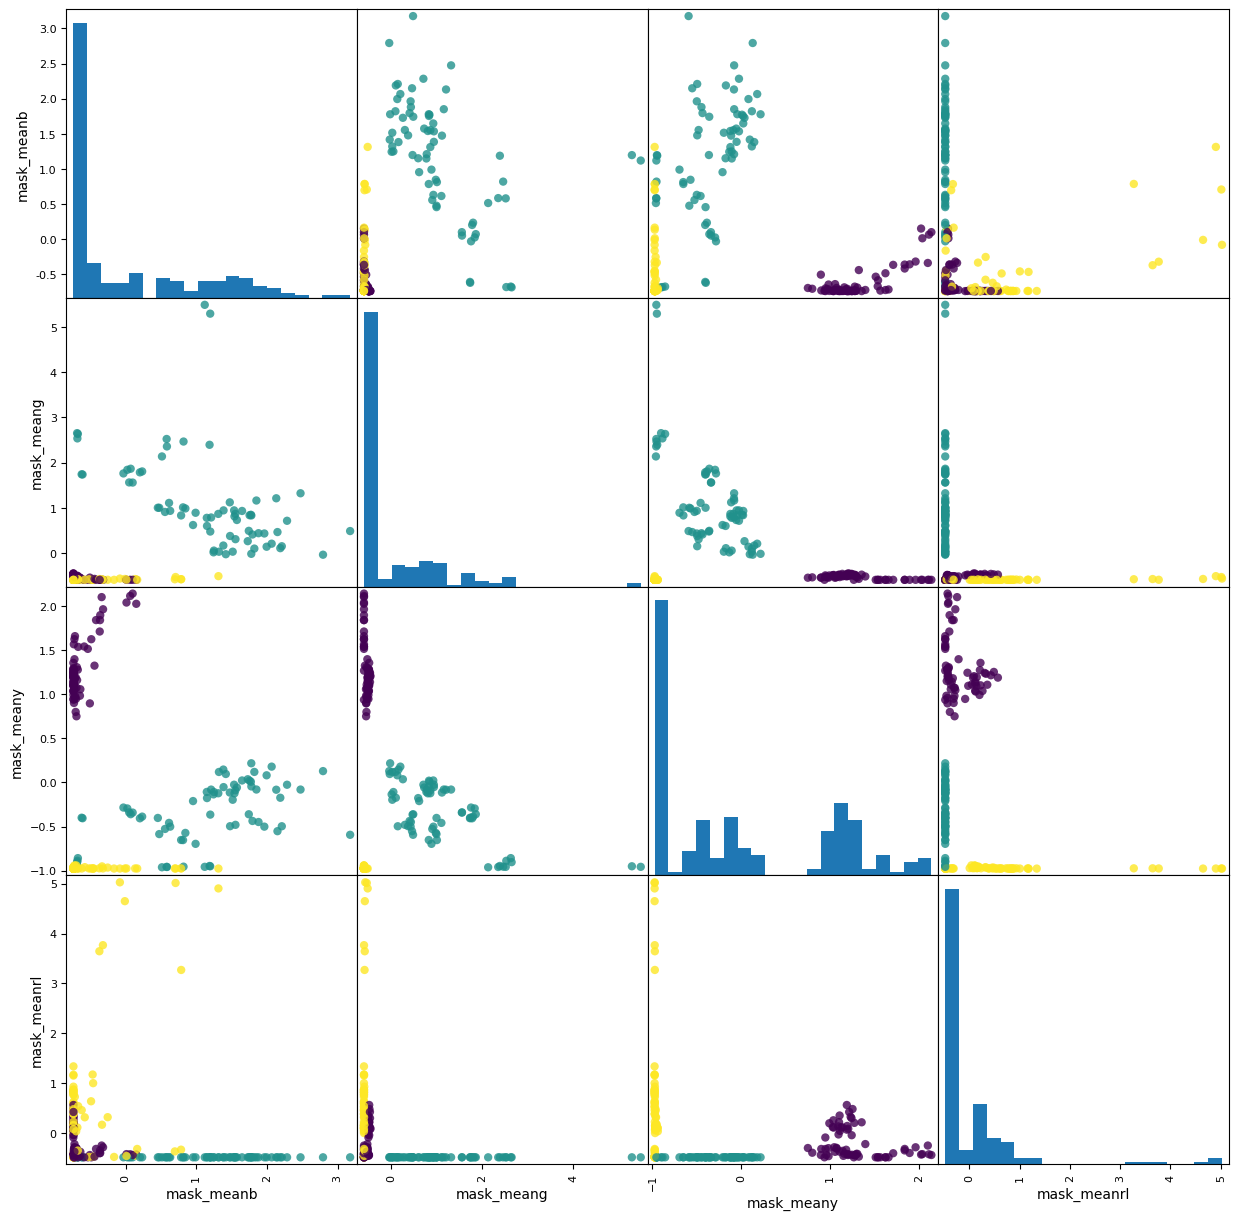

In [73]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=caracteristicas)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, alpha=.8 )
# grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, diagonal='kde', figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, alpha=.8 )

Obtain statistics decriptive: medidas de tendencia central y las medidas de variabilidad o dispersión

VIOLIN PLOT FOR FEATURES OF THE EACH CLASS 

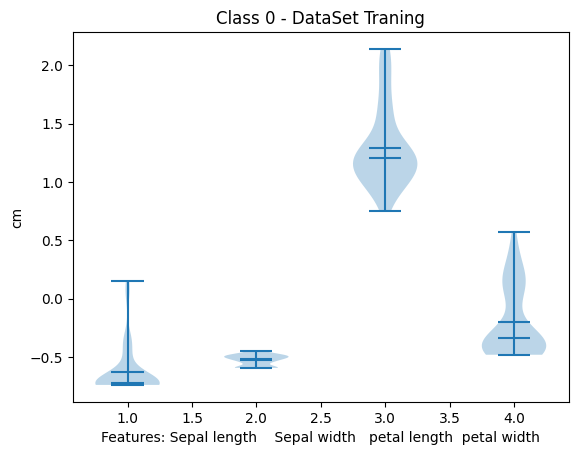

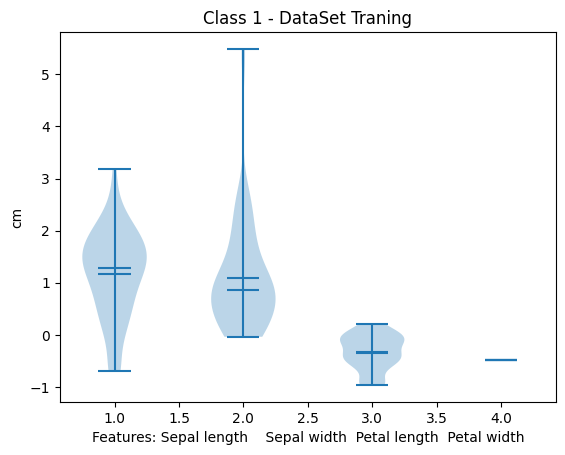

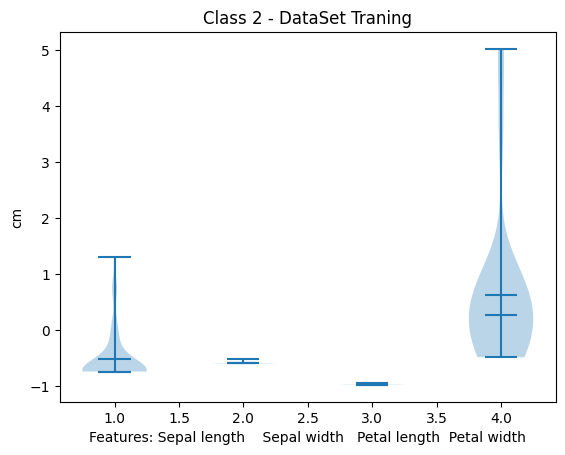

In [74]:
# Because X_train is obtained randomly

# Get index of y_train  Class 0
index_C0=np.asarray(y_train==1).nonzero()
# Get the row number of index_C0 
shape_index_C0=np.asarray(index_C0).shape 
nrowC0=shape_index_C0[1]
#print("nrowC0:", nrowC0 )
X_train_C0=np.resize(X_train[index_C0, :], (nrowC0,4))
#Violin plot for Training Class 0
plt.pyplot.violinplot(X_train_C0, positions=None, vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=True, quantiles=None, points=100, bw_method=None, data=None)
plt.pyplot.title("Class 0 - DataSet Traning")
plt.pyplot.xlabel("Features: Sepal length    Sepal width   petal length  petal width")
plt.pyplot.ylabel("cm")
plt.pyplot.show()


##
# Get index of y_train  Class 1
index_C1=np.asarray(y_train==2).nonzero()
# Get the row number of index_C1 
shape_index_C1=np.asarray(index_C1).shape 
nrowC1=shape_index_C1[1]
#print("nrowC1:", nrowC1 )
X_train_C1=np.resize(X_train[index_C1, :], (nrowC1,4))
#Violin plot for Training Class 1
plt.pyplot.violinplot(X_train_C1, positions=None, vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=True, quantiles=None, points=100, bw_method=None, data=None)
plt.pyplot.title("Class 1 - DataSet Traning")
plt.pyplot.xlabel("Features: Sepal length    Sepal width  Petal length  Petal width")
plt.pyplot.ylabel("cm")
plt.pyplot.show()


##
# Get index of y_train  Class 2
index_C2=np.asarray(y_train==3).nonzero()
# Get the row number of index_C2 
shape_index_C2=np.asarray(index_C2).shape 
nrowC2=shape_index_C2[1]
#print("nrowC2:", nrowC2 )
X_train_C2=np.resize(X_train[index_C2, :], (nrowC2,4))
#Violin plot for Training Class 2
plt.pyplot.violinplot(X_train_C2, positions=None, vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=True, quantiles=None, points=100, bw_method=None, data=None)
plt.pyplot.title("Class 2 - DataSet Traning")
plt.pyplot.xlabel("Features: Sepal length    Sepal width   Petal length  Petal width")
plt.pyplot.ylabel("cm")
plt.pyplot.show()



Visualización Datos Estadísticos Descriptivos
---

In [75]:
# Function for obtain the statistic of an array
def stadist_desc_DataSet(Data_set):
    #Obtain the statistic of the Data_set array.  Each column is a feature.

    import numpy as n
    import scipy as sp 
    from scipy import stats
    from  scipy.stats import skew , kurtosis, mode

    ave= np.average(Data_set, axis=0)
    med= np.median(Data_set, axis=0)
    mea= np.mean(Data_set, axis=0)
    std= np.std(Data_set, axis=0)
    
    mod=sp.stats.mode(Data_set, axis=0) #Genera dos respuestas: la moda y la frecuencia
    ske=sp.stats.skew(Data_set, axis=0)
    kur=sp.stats.kurtosis(Data_set, axis=0)

    min= np.amin(Data_set, axis=0)
    qua= np.quantile(Data_set, axis=0, q=[0.25, 0.5, 0.75 ] )  #Quantiles
    max= np.amax(Data_set, axis=0)
    
      
    Stat_data_set= pd.DataFrame([ave, med, mea, std, mod[0][0], ske, kur, min, 
                qua[0,:],qua[1,:], qua[2,:] , max], index=['Average', 'Median',
                'Mean', 'Stand Dev', 'Mode', 'Skew', 'Kurtosis',  'Min', 
                'Quant 0.25', 'Quant 0.50', 'Quant 0.75' , 'Max'], 
                columns=['Sepal length', 'Sepal width','Petal length', 'Petal width'] )
 
    return   Stat_data_set


# Stadistic for feactures the Class 0
Stat_C0= stadist_desc_DataSet(X_train_C0)
display('Statistic for Class 0', Stat_C0)
print("\n")

# Stadistic for feactures the Class 1
Stat_C1= stadist_desc_DataSet(X_train_C1)
display('Statistic for Class 1', Stat_C1)
print("\n")

# Stadistic for feactures the Class 2
Stat_C2= stadist_desc_DataSet(X_train_C2)
display('Statistic for Class 2', Stat_C2)
print("\n")




/var/folders/m6/7mj8vx8n2nz65z01dfkj5_0w0000gn/T/ipykernel_24922/637112337.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mod=sp.stats.mode(Data_set, axis=0) #Genera dos respuestas: la moda y la frecuencia


'Statistic for Class 0'

,Sepal length,Sepal width,Petal length,Petal width
Average,-0.630019,-0.527354,1.293107,-0.202193
Median,-0.725226,-0.514786,1.202267,-0.335186
Mean,-0.630019,-0.527354,1.293107,-0.202193
Stand Dev,0.209451,0.045704,0.333438,0.297006
Mode,-0.736695,-0.592171,0.749528,-0.479824
Skew,2.419455,-0.313197,1.061960,0.926386
Kurtosis,5.204622,-1.292173,0.347170,-0.521163
Min,-0.738270,-0.592360,0.749528,-0.479824
Quant 0.25,-0.736695,-0.592038,1.077522,-0.433996
Quant 0.50,-0.725226,-0.514786,1.202267,-0.335186


/var/folders/m6/7mj8vx8n2nz65z01dfkj5_0w0000gn/T/ipykernel_24922/637112337.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mod=sp.stats.mode(Data_set, axis=0) #Genera dos respuestas: la moda y la frecuencia
/var/folders/m6/7mj8vx8n2nz65z01dfkj5_0w0000gn/T/ipykernel_24922/637112337.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ske=sp.stats.skew(Data_set, axis=0)
/var/folders/m6/7mj8vx8n2nz65z01dfkj5_0w0000gn/T/ipykernel_24922/637112337.py:17: RuntimeWarning: Precision loss occurred in mome

'Statistic for Class 1'

,Sepal length,Sepal width,Petal length,Petal width
Average,1.167885,1.096949,-0.332148,-4.798239e-01
Median,1.280552,0.866161,-0.340521,-4.798239e-01
Mean,1.167885,1.096949,-0.332148,-4.798239e-01
Stand Dev,0.841039,1.041958,0.333739,2.220446e-16
Mode,-0.685090,-0.036905,-0.961263,-4.798239e-01
Skew,-0.393469,2.073776,-0.427878,NaN
Kurtosis,-0.112136,5.864418,-0.785062,NaN
Min,-0.685090,-0.036905,-0.961263,-4.798239e-01
Quant 0.25,0.592728,0.434066,-0.520592,-4.798239e-01
Quant 0.50,1.280552,0.866161,-0.340521,-4.798239e-01


/var/folders/m6/7mj8vx8n2nz65z01dfkj5_0w0000gn/T/ipykernel_24922/637112337.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mod=sp.stats.mode(Data_set, axis=0) #Genera dos respuestas: la moda y la frecuencia


'Statistic for Class 2'

,Sepal length,Sepal width,Petal length,Petal width
Average,-0.507794,-0.587461,-0.971113,0.634282
Median,-0.736695,-0.592171,-0.974642,0.275608
Mean,-0.507794,-0.587461,-0.971113,0.634282
Stand Dev,0.444738,0.012941,0.008467,1.347726
Mode,-0.736695,-0.592171,-0.976128,-0.479678
Skew,2.333541,4.310349,2.466447,2.114517
Kurtosis,4.883518,20.202355,5.395943,3.863555
Min,-0.736695,-0.592360,-0.976128,-0.480355
Quant 0.25,-0.736695,-0.592171,-0.975696,-0.323427
Quant 0.50,-0.736695,-0.592171,-0.974642,0.275608


Violinplot of the each features for the classes


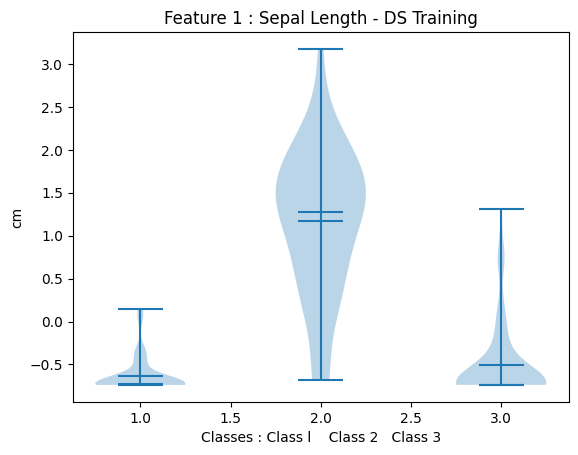

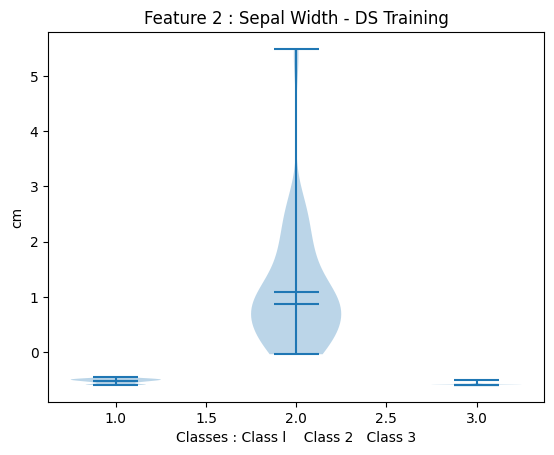

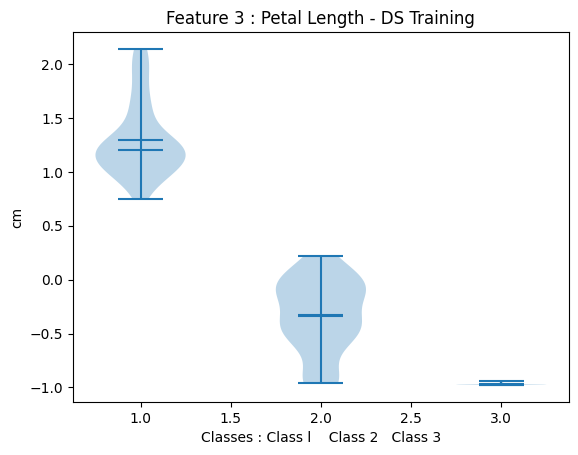

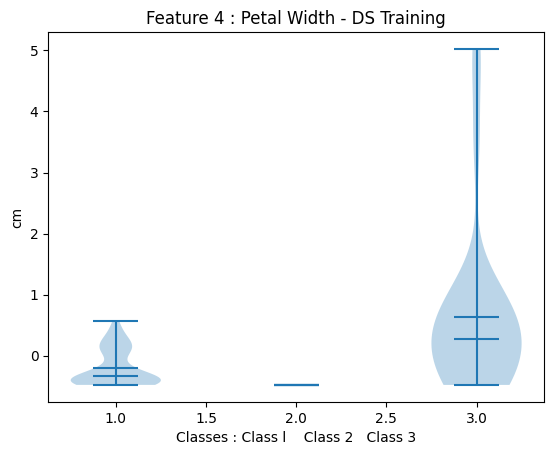

In [76]:
#Creación de arreglos np a partir del data set de entrenamiento
# Se obtiene un arrego por cada característica presente en las cuatro clases. 

Sepal_length=[ X_train_C0[:, 0], X_train_C1[:, 0], X_train_C2[:, 0] ]

Sepal_width=[ X_train_C0[:, 1], X_train_C1[:, 1], X_train_C2[:, 1] ]

Petal_length=[ X_train_C0[:, 2], X_train_C1[:, 2], X_train_C2[:, 2] ]

Petal_width=[ X_train_C0[:, 3], X_train_C1[:, 3], X_train_C2[:, 3] ]


# Violin Plot : Feature Sepal Length for each class
plt.pyplot.violinplot(Sepal_length, positions=None, vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=True, quantiles=None, points=100, bw_method=None, data=None)
plt.pyplot.title("Feature 1 : Sepal Length - DS Training")
plt.pyplot.xlabel("Classes : Class l    Class 2   Class 3")
plt.pyplot.ylabel("cm")
plt.pyplot.show()

# Violin Plot : Feature Sepal Width for each class
plt.pyplot.violinplot(Sepal_width, positions=None, vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=True, quantiles=None, points=100, bw_method=None, data=None)
plt.pyplot.title("Feature 2 : Sepal Width - DS Training")
plt.pyplot.xlabel("Classes : Class l    Class 2   Class 3")
plt.pyplot.ylabel("cm")
plt.pyplot.show()

# Violin Plot : Feature Petal Length for each class
plt.pyplot.violinplot(Petal_length, positions=None, vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=True, quantiles=None, points=100, bw_method=None, data=None)
plt.pyplot.title("Feature 3 : Petal Length - DS Training")
plt.pyplot.xlabel("Classes : Class l    Class 2   Class 3")
plt.pyplot.ylabel("cm")
plt.pyplot.show()

# Violin Plot : Feature Petal Width for each class
plt.pyplot.violinplot(Petal_width, positions=None, vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=True, quantiles=None, points=100, bw_method=None, data=None)
plt.pyplot.title("Feature 4 : Petal Width - DS Training")
plt.pyplot.xlabel("Classes : Class l    Class 2   Class 3")
plt.pyplot.ylabel("cm")
plt.pyplot.show()



Convert numpy Array to dataframe
Save to excel file


In [77]:
"""
#Convert the Numpy array to pandas data frame

# File to Sepal_length
df_Sepal_length=pd.DataFrame(Sepal_length, columns=['Class 1', 'Class 2', 'Class 3'])

from google.colab import files

df_Sepal_length.to_excel('Sepal_length.xlsx')

files.download('Sepal_length.xlsx')

# File to X_train Numpy Array
df_X_train=pd.DataFrame(X_train, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

df_X_train.to_excel('X_train.xlsx')

files.download('X_train.xlsx')

# File to Petal_width Numpy Array
df_Petal_width=pd.DataFrame(Petal_width, columns=['Class 1', 'Class 2', 'Class 3'])

df_Petal_width.to_excel('Petal_width.xlsx')

files.download('Petal_width.xlsx')


"""

"\n#Convert the Numpy array to pandas data frame\n\n# File to Sepal_length\ndf_Sepal_length=pd.DataFrame(Sepal_length, columns=['Class 1', 'Class 2', 'Class 3'])\n\nfrom google.colab import files\n\ndf_Sepal_length.to_excel('Sepal_length.xlsx')\n\nfiles.download('Sepal_length.xlsx')\n\n# File to X_train Numpy Array\ndf_X_train=pd.DataFrame(X_train, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])\n\ndf_X_train.to_excel('X_train.xlsx')\n\nfiles.download('X_train.xlsx')\n\n# File to Petal_width Numpy Array\ndf_Petal_width=pd.DataFrame(Petal_width, columns=['Class 1', 'Class 2', 'Class 3'])\n\ndf_Petal_width.to_excel('Petal_width.xlsx')\n\nfiles.download('Petal_width.xlsx')\n\n\n"

CLASIFICADOR KNN

In [78]:
# KNN instantiate
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
#knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') 
#knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')

# Build the model (Parámetros por defecto)
knn.fit(X_train, y_train)

# Inference/Prediction
y_pred = knn.predict(X_test)

# Confusion Matriz
from sklearn.metrics import confusion_matrix
Conf_matr=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n ",Conf_matr)

df_Conf_matr=pd.DataFrame(Conf_matr, index=iris_dataset['target_names']  ,  columns=iris_dataset['target_names'])

display(df_Conf_matr)
#print(df_Conf_matr)


# Métricas de desempeño
from sklearn.metrics import accuracy_score
accu=accuracy_score(y_test,y_pred)
print("Accuracy:", accu)

from sklearn.metrics import precision_score
prec=accuracy_score(y_test,y_pred)
print("Precision:", prec)

from sklearn.metrics import f1_score
f1sc=f1_score(y_test,y_pred, average = None)
#f1sc=f1_score(y_test,y_pred, average = 'micro')
#f1sc=f1_score(y_test,y_pred, average = 'macro')
print("F1 score:", f1sc)

from sklearn.metrics import recall_score
reca =recall_score(y_test,y_pred, average = None)
print("Sensibilidad Recall:", reca) 


Confusion Matrix: 
  [[30  0  0]
 [ 0 30  0]
 [ 0  0 30]]


,setosa,versicolor,virginica
setosa,30,0,0
versicolor,0,30,0
virginica,0,0,30


Accuracy: 1.0
Precision: 1.0
F1 score: [1. 1. 1.]
Sensibilidad Recall: [1. 1. 1.]
